In [3]:
import sys
sys.path.append("..") # Adds higher directory to python modules path
from loaddata import BengaliAI, load_df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

def sprinkles(img, size, perc, style='black'):
    """Produces 'sprinkles' image augmentation on input
    see: https://medium.com/@lessw/progressive-sprinkles-a-new-data-augmentation-for-cnns-and-helps-achieve-new-98-nih-malaria-6056965f671a
    
    Parameters
    ----------
    x = np.array of input image
    size = int specifying sprinkle width and height in pixels
    perc = approximate (sprinkles can overlap) percentage of image to occlude
    style = string, option of ['black', 'frosted', 'mean'] for style of sprinkle
    """
    x = img.copy()
    number_of_pixels_to_frost = perc * np.ceil((x.shape[0] * x.shape[0]))
    number_of_sprinkles = int(np.ceil(number_of_pixels_to_frost / (size * size)))
    # TODO need to handle RGB channels - multiple arrays
    for sprinkle in range(0, number_of_sprinkles):
        # set boundaries to preven out of index errors
        options = range((size), (x.shape[0] - size))
        # get random index position
        row = np.random.choice(options, replace=False)
        col = np.random.choice(options, replace=False)
        # change initial pixel value
        x[row, col] = np.random.randint(0, 255)
        # randomly determine fill direction
        horizontal_fill_direction = np.random.choice(["left", "right"])
        vertical_fill_direction = np.random.choice(["up", "down"])
        if style == 'mean':
            mean = cv2.mean(x)
        # replace pixel values
        if (horizontal_fill_direction == "left") & (vertical_fill_direction == "up"):
            for i in (range(0, (size - 1))):
                for j in (range(0, (size - 1))):
                    for c in [0, 1, 2]:
                        if style == 'frosted':
                            x[(row - j), (col - i)][c] = np.random.randint(0, 255)
                        elif style == 'mean':
                            x[(row - j), (col - i)][c] = mean[c]
                        else:
                            x[(row - j), (col - i)] = 0
        elif (horizontal_fill_direction == "left") & (vertical_fill_direction == "down"):
            for i in (range(0, (size-1))):
                for j in (range(0, (size-1))):
                    for c in [0, 1, 2]:
                        if style == 'frosted':
                            x[(row - j), (col + i)][c] = np.random.randint(0, 255)
                        elif style == 'mean':
                            x[(row - j), (col - i)][c] = mean[c]
                        else:
                            x[(row - j), (col + i)] = 0
        elif (horizontal_fill_direction == "right") & (vertical_fill_direction == "up"):
            for i in (range(0, (size-1))):
                for j in (range(0, (size-1))):
                    for c in [0, 1, 2]:
                        if style == 'frosted':
                            x[(row + j), (col - i)][c] = np.random.randint(0, 255)
                        elif style == 'mean':
                            x[(row - j), (col - i)][c] = mean[c]
                        else:
                            x[(row + j), (col - i)] = 0
        elif (horizontal_fill_direction == "right") & (vertical_fill_direction == "down"):
            for i in (range(0, (size-1))):
                for j in (range(0, (size-1))):
                    for c in [0, 1, 2]:
                        if style == 'frosted':
                            x[(row - j), (col - i)][c] = np.random.randint(0, 255)
                        elif style == 'mean':
                            x[(row - j), (col - i)][c] = mean[c]
                        else:
                            x[(row - j), (col - i)] = 0
    return np.array(x)

In [6]:
df, _ = load_df(True, root='../data')
dataset = BengaliAI(df[:10000])
dataloader = DataLoader(dataset, batch_size=32)

(50210, 16389)


torch.Size([1, 128, 128])


AttributeError: 'Tensor' object has no attribute 'copy'

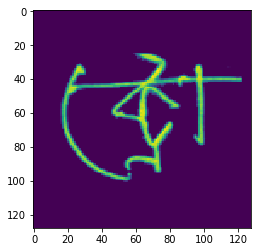

In [11]:
for (img, l) in dataset:
    print(img.shape)
    plt.imshow(img.view(-1, 128))
    plt.imshow(sprinkles(img.view(-1, 128), size=5, perc=0.1))
    break